In [1]:
import pygad

NONE = -1
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

WALL = 4
PATH = 5
STRT = 6
EXIT = 7

labyrinth = [
    [WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL],
    [WALL, STRT, PATH, PATH, WALL, PATH, PATH, PATH, WALL, PATH, PATH, WALL],
    [WALL, WALL, WALL, PATH, PATH, PATH, WALL, PATH, WALL, WALL, PATH, WALL],
    [WALL, PATH, PATH, PATH, WALL, PATH, WALL, PATH, PATH, PATH, PATH, WALL],
    [WALL, PATH, WALL, PATH, WALL, WALL, PATH, PATH, WALL, WALL, PATH, WALL],
    [WALL, PATH, PATH, WALL, WALL, PATH, PATH, PATH, WALL, PATH, PATH, WALL],
    [WALL, PATH, PATH, PATH, PATH, PATH, WALL, PATH, PATH, PATH, WALL, WALL],
    [WALL, PATH, WALL, PATH, PATH, WALL, WALL, PATH, WALL, PATH, PATH, WALL],
    [WALL, PATH, WALL, WALL, WALL, PATH, PATH, PATH, WALL, WALL, PATH, WALL],
    [WALL, PATH, WALL, PATH, WALL, WALL, PATH, WALL, PATH, WALL, PATH, WALL],
    [WALL, PATH, WALL, PATH, PATH, PATH, PATH, PATH, PATH, PATH, EXIT, WALL],
    [WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL, WALL]
]

max_steps = 30

gene_space = [NONE, UP, RIGHT, DOWN, LEFT]

# Przygotowanie

Na początek tworzymy wszystkie potrzebne rzeczy. Oczywiście importujemy bibliotekę pygad, dajemy aliasy cyfrom, które ułatwią czytanie kodu dalej, zapisujemy nasz labirynt w dwuwymiarowej tablicy, ustalamy maksymalną ilość kroków (która później stanie się ilością genów) i tworzymy nasz gene_space, który odpowiada ruchom. Teraz możemy zacząć z funkcją fitness.

In [2]:
def find_start_end(labyrinth):
    re = {'start': None, 'end': None}
    for i in range(len(labyrinth)):
        for j in range(len(labyrinth[i])):
            if labyrinth[i][j] == STRT:
                re["start"] = [i, j]
            if labyrinth[i][j] == EXIT:
                re["end"] = [i, j]
            if re["end"] != None and re["start"] != None:
                return re

## Funkcja find_start_end

Najpierw prosta funkcja pomocnicza, która znajduje start i koniec, gdybyśmy chcieli zastosować nasz program do innego labiryntu.

In [3]:
def check_move(pos, move, nextmove=None):
    fitness_change = 0

    if move == NONE:
        fitness_change -= 100
        return {"new_position": pos, "fitness_change": fitness_change}

    if move == UP:
        newpos = [pos[0] - 1, pos[1]]
        if nextmove != None and nextmove == DOWN:
            fitness_change -= 100
        else:
            fitness_change += 5
    elif move == RIGHT:
        newpos = [pos[0], pos[1] + 1]
        if nextmove != None and nextmove == LEFT:
            fitness_change -= 100
        else:
            fitness_change += 5
    elif move == DOWN:
        newpos = [pos[0] + 1, pos[1]]
        if nextmove != None and nextmove == UP:
            fitness_change -= 100
        else:
            fitness_change += 5
    elif move == LEFT:
        newpos = [pos[0], pos[1] - 1]
        if nextmove != None and nextmove == RIGHT:
            fitness_change -= 100
        else:
            fitness_change += 5

    if labyrinth[newpos[0]][newpos[1]] == WALL:
        fitness_change -= 100
        return {"new_position": pos, "fitness_change": fitness_change}
    else:
        fitness_change += 10
        return {"new_position": newpos, "fitness_change": fitness_change}


def fitness_func(solution, solution_idx):
    tmp = find_start_end(labyrinth)
    pos = tmp["start"]
    end = tmp["end"]
    ended = False

    fitness = 0

    for i in range(len(solution)):
        if pos == end and solution[i] == NONE:
            fitness += 1000
        if ended == False and pos == end:
            ended = True
            fitness += 10000

        # if last move
        if i == len(solution) - 1:
            move = check_move(pos, solution[i])
            pos = move["new_position"]
            fitness += move["fitness_change"]

            distance = abs(pos[0] - end[0]) + abs(pos[1] - end[1])
            fitness -= i*distance
        else:
            move = check_move(pos, solution[i], solution[i + 1])
            pos = move["new_position"]
            fitness += move["fitness_change"]

            distance = abs(pos[0] - end[0]) + abs(pos[1] - end[1])
            fitness -= i*distance

    return fitness

# Funkcja fitness

## Funkcja check_move

Teraz zaczyna się robić poważnie. Funkcja check_move sprawdza ruchy i przyznaje punkty w zależności od tego, czy ruch jest odpowiedni. Odejmuje punkty za brak ruchu (więcej o tym za chwilę), za wchodzenie w ściany i ruchy typu "góra, dół", "lewo, prawo" itd, które nie zmieniają naszej pozycji i marnują ruchy. Każda ze wspomnianych cech, które chcemy uniknąć odejmuje tyle samo punktów, żeby nie był preferowany jeden z błędnych ruchów, który kosztowałby najmniej.

## Funkcja fitness_func

W samej funkcji fitness mamy nagrodę za finisz, nagrodę za zatrzymanie się na finiszu (każdy ruch, który jest typu NONE, kiedy jesteśmy na finiszu daje nam punkty fitness) oraz odejmuje punkty za dystans od końca labiryntu. Żeby zmniejszyć karę za szukanie ścieżki, która biegnie dalej od mety ta kara jest mnożona przez ilość ruchów już wykonanych.

In [4]:
# variables
fitness_function = fitness_func

sol_per_pop = 30
num_genes = max_steps

num_parents_mating = 15
num_generations = 1000
keep_parents = 15

parent_selection_type = "sss"

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 4

# Zmienne pygad

Czas na zadeklarowanie naszych zmiennych. Po wielu próbach te liczby okazały się najbardziej efektywne. Dalsze zwiększanie populacji lub generacji nie przynosi większych zysków. Mutacje są, zgodnie z zadaniem, jak najniższe - na poziomie 4%.

Teraz tylko zainicjalizować i puścić program w ruch.

Parameters of the best solution : [ 1.  1.  2.  2.  1.  0.  1.  1.  1.  0.  1.  1.  2.  2.  1.  2.  3.  2.
  2.  2.  1.  1.  2.  1.  2.  2.  2. -1. -1. -1.]
Fitness value of the best solution = 10321


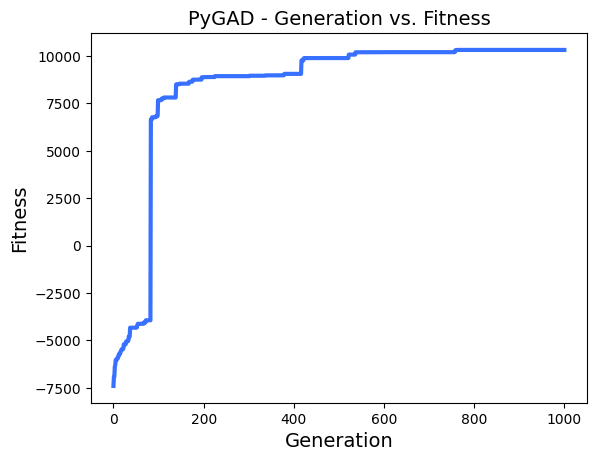

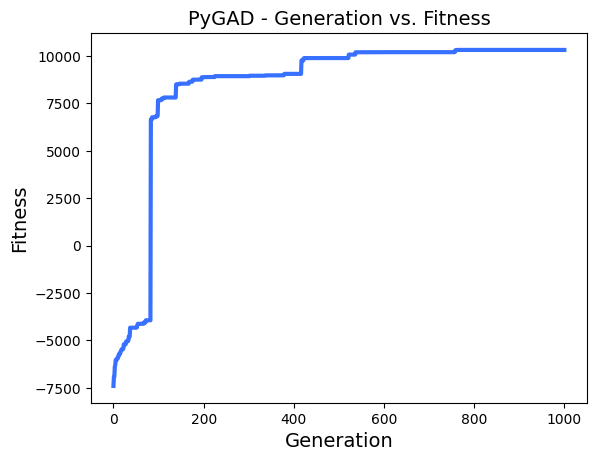

In [5]:
# init
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

# running the algorithm
ga_instance.run()

# summary
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

# chart
ga_instance.plot_fitness()


# Podsumowanie

Nie udało mi się uzyskać idealnego rozwiązania. Zazwyczaj ostatnie 6-7 ruchów jest NONE na finiszu, podczas gdy przy idealnym rozwiązaniu byłoby to 10. Po wielu próbach poprawienia funkcji fitness ostatecznie poddałem się, i najlepsze ze znalezionych rozwiązań zazwyczaj uderza w ścianę kilka razy.